# Explatory Data Analysis on Powerlifting Data

Our data consists of two csv files. First is named "meets", which holds information about different powerlifting meetings around the globe. Latter contains stats of individual lifters like name,age,total kilograms lifted etc.

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Step 1: Data Preprocessing

In [106]:
meets = pd.read_csv("C:/Users/Berk/Desktop/PYTHON/meets.csv")

In [107]:
meets.head()

,MeetID,MeetPath,Federation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,0,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
1,1,365strong/1602,365Strong,2016-11-19,USA,MO,Ozark,Thanksgiving Powerlifting Classic
2,2,365strong/1603,365Strong,2016-07-09,USA,NC,Charlotte,Charlotte Europa Games
3,3,365strong/1604,365Strong,2016-06-11,USA,SC,Rock Hill,Carolina Cup Push Pull Challenge
4,4,365strong/1605,365Strong,2016-04-10,USA,SC,Rock Hill,Eastern USA Challenge


In [108]:
meets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8482 entries, 0 to 8481
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MeetID       8482 non-null   int64 
 1   MeetPath     8482 non-null   object
 2   Federation   8482 non-null   object
 3   Date         8482 non-null   object
 4   MeetCountry  8482 non-null   object
 5   MeetState    5496 non-null   object
 6   MeetTown     6973 non-null   object
 7   MeetName     8482 non-null   object
dtypes: int64(1), object(7)
memory usage: 530.2+ KB


In [109]:
meets.isnull().sum()

MeetID            0
MeetPath          0
Federation        0
Date              0
MeetCountry       0
MeetState      2986
MeetTown       1509
MeetName          0
dtype: int64

In [110]:
stats = pd.read_csv("C:/Users/Berk/Desktop/PYTHON/openpowerlifting.csv")

In [111]:
stats.head()

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47


I would like to use "MeetName" variable in categorization/grouping operations and "Date" variable in time based analyses.Both of these variables belongs to "meets" dataframe,so I will insert them to the "stats" dataframe in following way:

In [112]:
meets.set_index(["MeetID"], inplace=True)
stats.set_index(["MeetID"], inplace=True)

stats = stats.join(meets).reset_index()

In [113]:
stats.head()

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,...,TotalKg,Place,Wilks,MeetPath,Federation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,...,138.35,1,155.05,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,...,401.42,1,456.38,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,...,401.42,1,456.38,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,...,95.25,1,108.29,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,...,122.47,1,130.47,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...


Now we will get rid of unrelevant features and make the column "MeetName" the first.

In [114]:
stats.drop(["MeetID","MeetPath","Federation","MeetCountry","MeetState","MeetTown"],axis =1, inplace = True)

In [115]:
# shift column 'MeetName' to first position
first_column = stats.pop('MeetName')
stats.insert(0, 'MeetName', first_column)


In [116]:
stats.head()

,MeetName,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks,Date
0,2016 Junior & Senior National Powerlifting Cha...,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05,2016-10-29
1,2016 Junior & Senior National Powerlifting Cha...,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38,2016-10-29
2,2016 Junior & Senior National Powerlifting Cha...,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38,2016-10-29
3,2016 Junior & Senior National Powerlifting Cha...,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29,2016-10-29
4,2016 Junior & Senior National Powerlifting Cha...,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47,2016-10-29


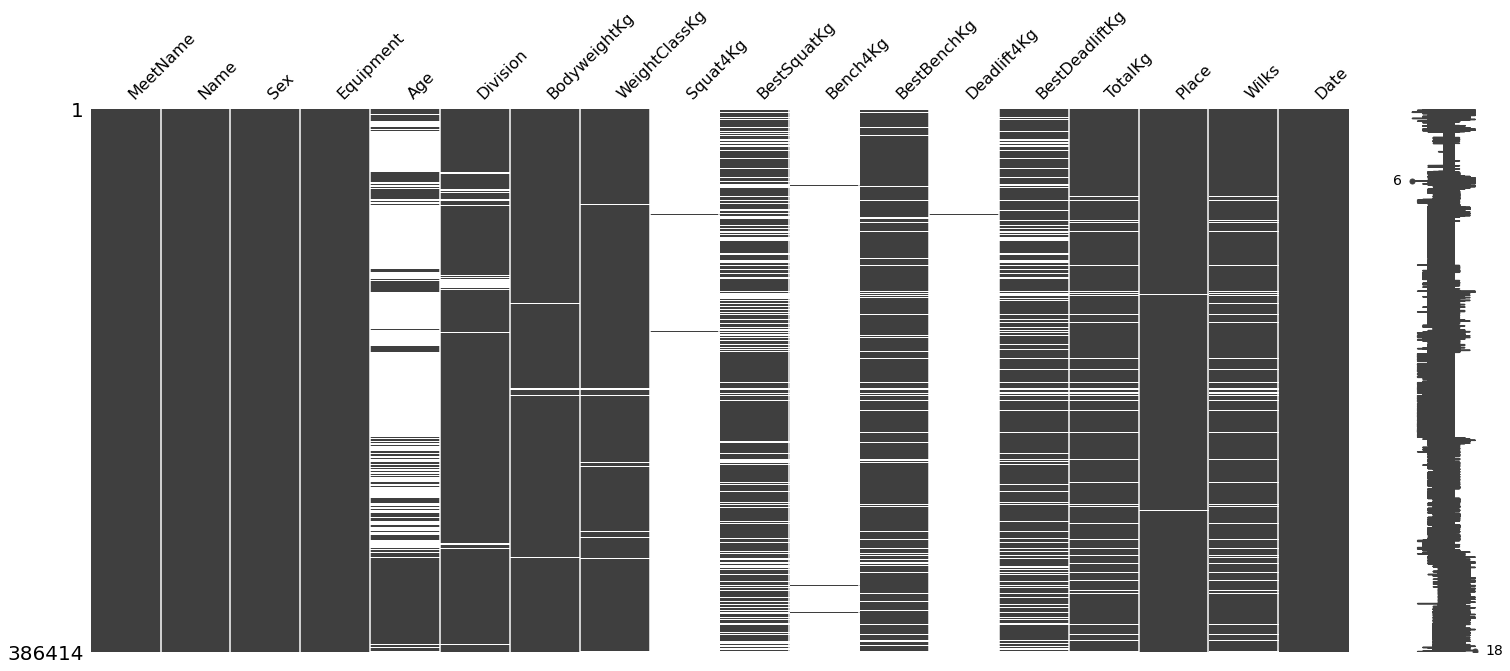

In [117]:
msno.matrix(stats);

A very large percent of the columns "Age", "Squat4Kg", "Bench4Kg", "Deadlift4Kg" is missing but we will remove only the "Age" column because:

1) "Division" feauture also represents age( in intervals )

2) Lift4Kg represents the weight in kilograms that a competetor lifted in his/her fourth attempt for a particular lift. A NaN value in this column might indicate to that lifter choose not to lift for the fourth time or an error happened during data collection. Positive values means the lifter was able to lifted that weight, and negative values means the lifter failed to lift that weight.Since "TotalKg" is the sum of all the weights for successful attempts,we will not remove those columns. We are going to impute 0 for NaN values.

In [118]:
stats.drop("Age",axis=1,inplace=True)

In [119]:
stats[["Squat4Kg","Bench4Kg","Deadlift4Kg"]] = stats[["Squat4Kg","Bench4Kg","Deadlift4Kg"]].fillna(0)

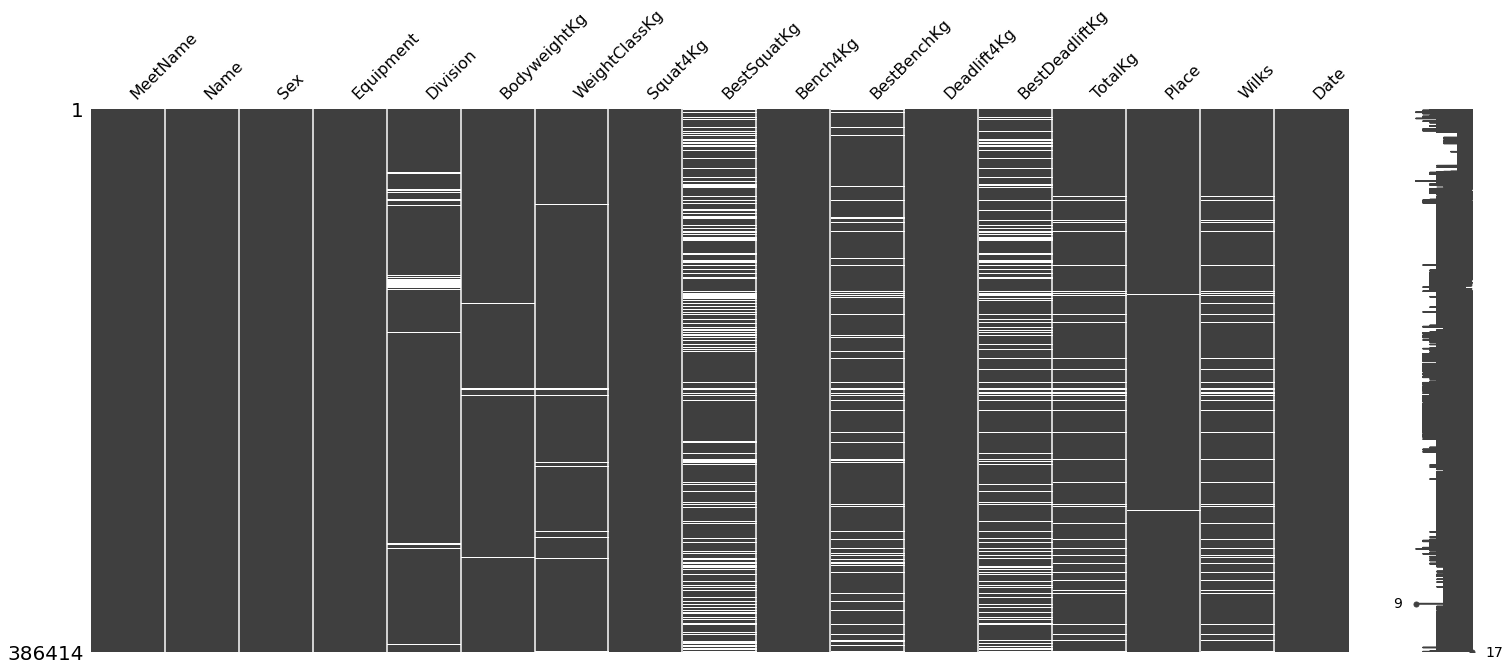

In [121]:
msno.matrix(stats);

## Step 2: Analysis and Exploring

In [ ]:
# does average kg lifted differ from meeting to meeting?

In [122]:
sorted_means_by_meeting = sorted(stats.groupby("MeetName")["TotalKg"].mean())

In [136]:
for meeting,value in stats.groupby("MeetName")["TotalKg"].mean().items():
    if value == 35.0:
        print(meeting)

2002 Open Powerlifting Meet


In [124]:
print(sorted_means_by_meeting[:5])
print("...")
print(sorted_means_by_meeting[-5:])

[35.0, 47.5, 50.0, 62.5, 80.44776119402985]
...
[1090.0, 1109.642857142857, 1113.4285714285713, 1121.6666666666667, 1135.5]


In [ ]:
# which event has the maximum total weight lifted

In [150]:
grouped_by_totalkg = stats.groupby("MeetName")["TotalKg"].describe()

In [151]:
max_totalkg = max(grouped_by_totalkg["max"])

In [153]:
stats[stats["TotalKg"] == max_totalkg]

,MeetName,Name,Sex,Equipment,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks,Date
57011,Champion of Champions 2,Dave Hoff,M,Multi-ply,Pro Open,131.09,140,0.0,560.19,0.0,437.72,0.0,367.41,1365.31,1,771.07,2017-10-07


In [154]:
# which lifter has the maximum deadlift?

In [171]:
stats[stats["BestDeadliftKg"] == max(stats["BestDeadliftKg"])]

,MeetName,Name,Sex,Equipment,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks,Date
67853,Clash of the Titans IV,Benedikt Magnusson,M,Raw,Heavy,172.82,140+,0.0,NaN,0.0,NaN,0.0,460.4,460.4,1,249.41,2011-04-02


In [157]:
# which female lifter has the maximum squat?

In [165]:
stats_F = stats[stats["Sex"] == "F"]

In [172]:
stats_F[stats_F["BestSquatKg"] == max(stats_F["BestSquatKg"])]

,MeetName,Name,Sex,Equipment,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks,Date
164532,Ironman Classic Pro/Am,Laura Phelps-Sweatt,F,Multi-ply,Pro,74.75,75,0.0,351.53,0.0,224.53,0.0,226.8,802.86,1,764.83,2012-03-10


In [168]:
# The Wilks score is used to compare lifted weight in powerlifting between lifters of different body weights and gender.
# Which lifter has the highest Wilks score?

In [173]:
stats[stats["Wilks"] == max(stats["Wilks"])]

,MeetName,Name,Sex,Equipment,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks,Date
53198,2013 IPA Westside Invitational Pro Open Powerl...,Dave Hoff,M,Multi-ply,Heavyweight,122.97,125,0.0,548.85,0.0,442.25,0.0,371.95,1363.05,1,779.38,2013-08-17


In [179]:
# distribution of total weight with respect to genders:

<Figure size 720x720 with 0 Axes>

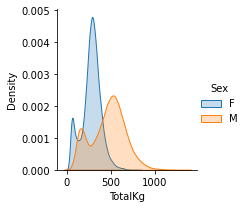

In [184]:
plt.figure(figsize = (10,10))
(sns.FacetGrid(stats,
              hue ="Sex",)
    .map(sns.kdeplot,"TotalKg",shade = True)
    .add_legend());

In [185]:
# a boxplot for male lifters Wilks score:

In [186]:
stats_M = stats[stats["Sex"] == "M"]

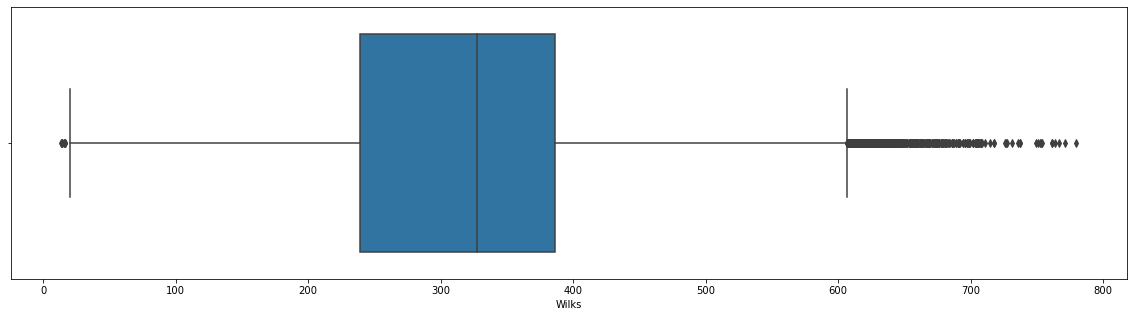

In [189]:
plt.figure(figsize = (20,5))
sns.boxplot(x = stats_M["Wilks"]);

In [191]:
# the relation between total weight lifted and place of the lifter:

In [193]:
stats["Place"].unique()

array(['1', '2', 'DQ', '3', 'G', '4', '5', '6', '7', '8', '9', '10', '11',
       'NS', nan, '15', '13', '14', '12', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', 'DD', '30',
       '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52',
       '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63',
       '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74',
       '75', '76', '77'], dtype=object)

In [ ]:
# general relationship between variables:

<AxesSubplot:>

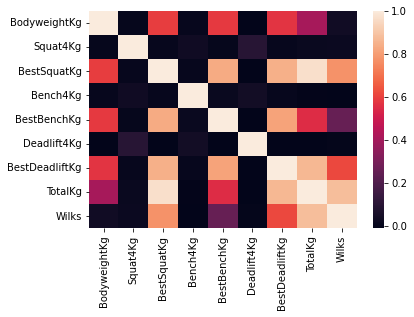

In [194]:
sns.heatmap(stats.corr())

In [195]:
# change in total weight in time

In [196]:
stats["Date"] = pd.to_datetime(stats["Date"])

In [198]:
mean_by_date = stats.groupby("Date")["TotalKg"].mean()

In [210]:
stats.groupby("Date")["Sex"]

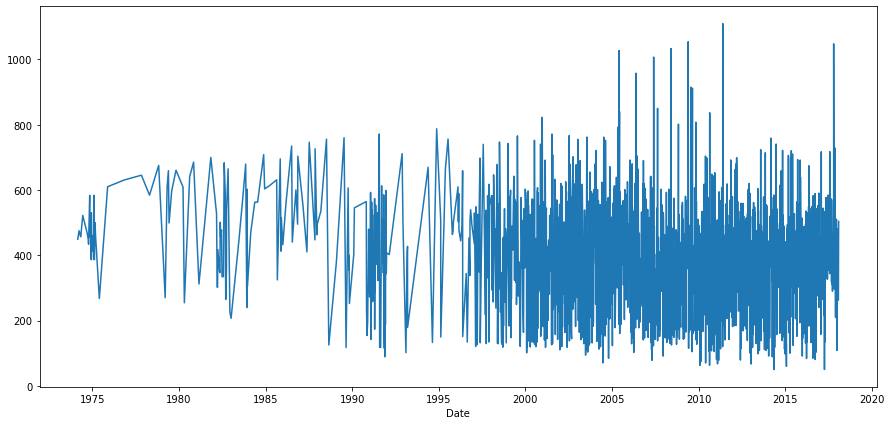

In [212]:
plt.figure(figsize = (15,7))
sns.lineplot(x = "Date",y = mean_by_date.values,data = mean_by_date);

In [218]:
stats_date = stats.set_index(stats["Date"])

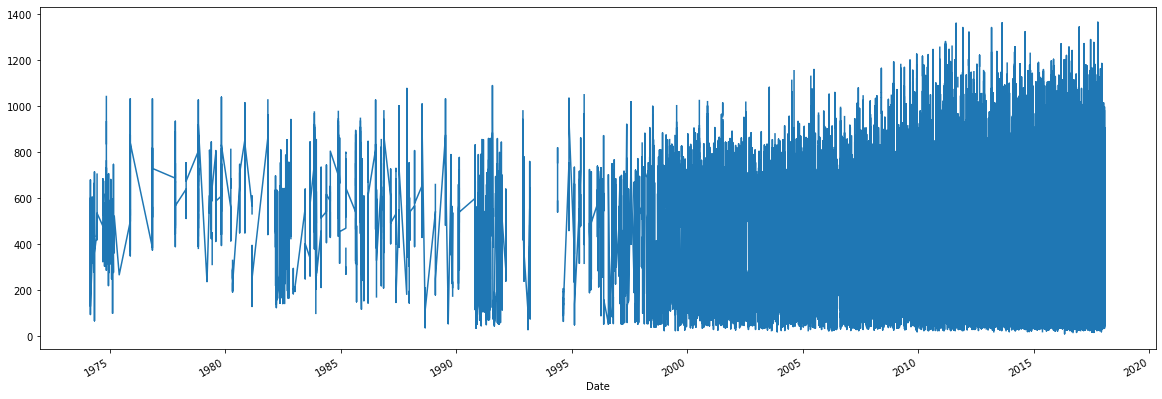

In [222]:
plt.figure(figsize = (20,7))
stats_date["TotalKg"].plot();